In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Descargar los datos de Yahoo Finance
data = yf.download('AAPL', start='2010-01-01', end='2022-04-15')

# Crear las variables predictoras (features)
data['SMA_10'] = data['Close'].rolling(window=10).mean()
data['SMA_30'] = data['Close'].rolling(window=30).mean()
data['SMA_60'] = data['Close'].rolling(window=60).mean()
data['SMA_100'] = data['Close'].rolling(window=100).mean()
data = data.dropna()
X = data[['SMA_10', 'SMA_30', 'SMA_60', 'SMA_100']].values

# Crear la variable objetivo (target)
y = data['Close'].values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Crear el modelo de regresión lineal
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predecir los precios de la acción utilizando los datos de prueba
y_pred = regressor.predict(X_test)

# Evaluar la precisión del modelo utilizando el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
#data = data.dropna()
print("Error cuadrático medio:", mse)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Error cuadrático medio: 2.524886943047802


[*********************100%***********************]  1 of 1 completed
Error cuadrático medio: 2.674201991792529


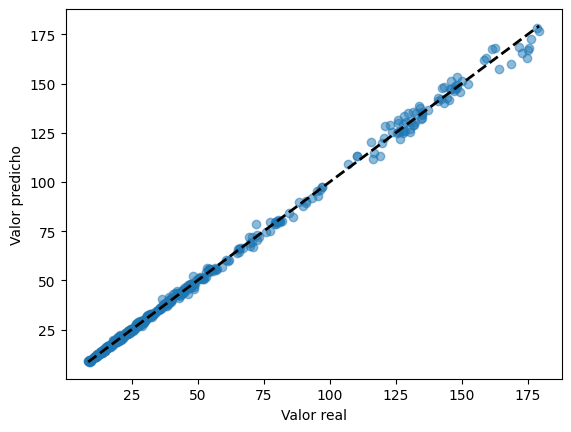

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Descargar los datos de Yahoo Finance
data = yf.download('AAPL', start='2010-01-01', end='2022-04-15')

# Crear las variables predictoras (features)
data['SMA_10'] = data['Close'].rolling(window=10).mean()
data['SMA_30'] = data['Close'].rolling(window=30).mean()
data['SMA_60'] = data['Close'].rolling(window=60).mean()
data['SMA_100'] = data['Close'].rolling(window=100).mean()
data = data.dropna()
X = data[['SMA_10', 'SMA_30', 'SMA_60', 'SMA_100']].values

# Crear la variable objetivo (target)
y = data['Close'].values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Crear el modelo de regresión lineal
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predecir los precios de la acción utilizando los datos de prueba
y_pred = regressor.predict(X_test)

# Evaluar la precisión del modelo utilizando el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio:", mse)

# Graficar los valores reales y predichos
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valor real')
plt.ylabel('Valor predicho')
plt.show()


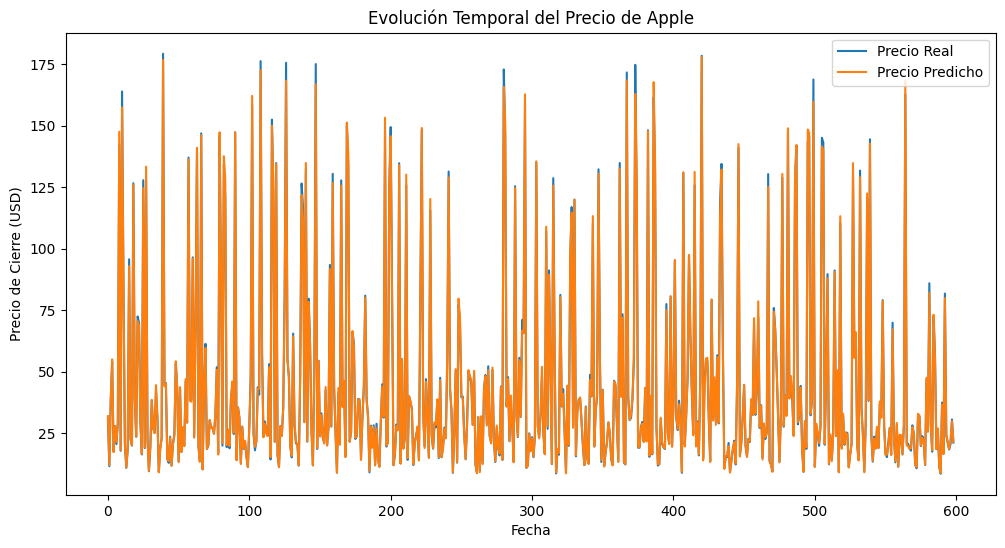

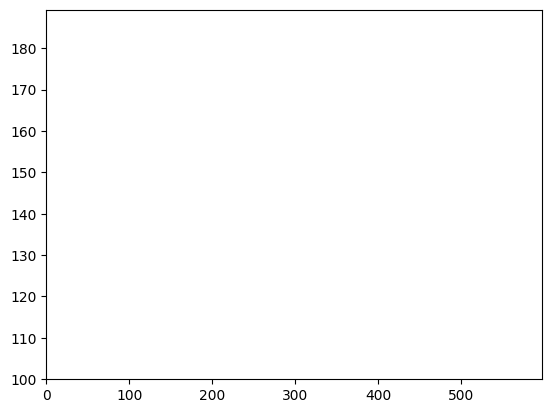

In [ ]:
# Crear un objeto pandas DataFrame para los datos de prueba
# Crear un objeto pandas DataFrame para los datos de prueba
df_test = pd.DataFrame({'Real': y_test, 'Predicción': y_pred})

# Convertir los índices a objetos datetime
#index_test = [data.index[i] for i in y_test.index]
#df_test.index = pd.to_datetime(index_test)

# Graficar la evolución temporal de los precios
plt.figure(figsize=(12,6))
plt.plot(df_test.index, df_test['Real'], label='Precio Real')
plt.plot(df_test.index, df_test['Predicción'], label='Precio Predicho')
plt.title('Evolución Temporal del Precio de Apple')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.legend()
plt.show()

plt.ylim((100, max(df_test['Real'].max(), df_test['Predicción'].max()) + 10))
plt.xlim((min(df_test.index), max(df_test.index)))
plt.show()






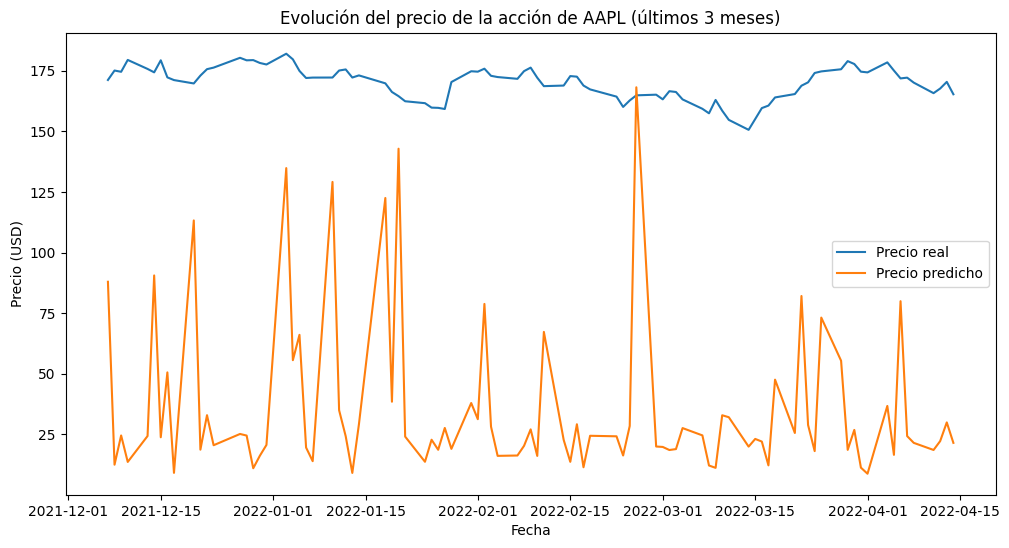

In [ ]:
import matplotlib.pyplot as plt

# Obtener los últimos 3 meses de datos
last_3_months = data.tail(90)

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(12,6))

# Graficar el precio real y el predicho para los últimos 3 meses
ax.plot(last_3_months.index, last_3_months['Close'], label='Precio real')
ax.plot(last_3_months.index, y_pred[-90:], label='Precio predicho')

# Añadir título y etiquetas de los ejes
ax.set_title('Evolución del precio de la acción de AAPL (últimos 3 meses)')
ax.set_xlabel('Fecha')
ax.set_ylabel('Precio (USD)')

# Añadir leyenda
ax.legend()

# Mostrar el gráfico
plt.show()


In [ ]:
print(last_3_months)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-12-07  169.080002  171.580002  168.339996  171.179993  169.932770   
2021-12-08  172.130005  175.960007  170.699997  175.080002  173.804352   
2021-12-09  174.910004  176.750000  173.919998  174.559998  173.288162   
2021-12-10  175.210007  179.630005  174.690002  179.449997  178.142517   
2021-12-13  181.119995  182.130005  175.529999  175.740005  174.459549   
...                ...         ...         ...         ...         ...   
2022-04-08  171.779999  171.779999  169.199997  170.089996  169.065842   
2022-04-11  168.710007  169.029999  165.500000  165.750000  164.751968   
2022-04-12  168.020004  169.869995  166.639999  167.660004  166.650482   
2022-04-13  167.389999  171.039993  166.770004  170.399994  169.373978   
2022-04-14  170.619995  171.270004  165.039993  165.289993  164.294739   

               Volume      SMA_10    

In [ ]:
print(y_pred[-90:])

[ 87.97378064  12.54457603  24.59493664  13.6792491   24.36347113
  90.58288596  23.85194945  50.60194045   9.16749333 113.2637763
  18.74041288  32.96277639  20.56517822  25.21197567  24.55260227
  11.07193771  16.21810237  20.68916601 134.84588206  55.64076217
  66.08664315  19.61976176  13.9907025  129.14358728  35.01045282
  24.26238841   9.14620309  29.18396496 122.51502818  38.5047616
 142.84180746  24.12762407  13.74512083  22.83406422  18.68993369
  27.68994133  19.07182701  37.97532836  31.305748    78.83474394
  28.22241067  16.1816164   16.32803131  20.32269021  27.10855399
  16.16427135  67.29846689  22.77545667  13.72293975  29.20846877
  11.48013181  24.46518156  24.24564679  16.33362245  28.51141543
 168.16633017  20.04196118  19.86011507  18.59483046  18.97514921
  27.63660518  24.6256022   12.20760691  11.23571523  32.92982694
  32.11678579  19.99688752  23.16727117  22.07662499  12.26069086
  47.61048755  25.61173694  82.09886069  28.91801322  18.14803532
  73.2023528

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Descargar los datos de Yahoo Finance
data = yf.download('AAPL', start='2010-01-01', end='2022-04-15')

# Crear las variables predictoras (features)
data['SMA_10'] = data['Close'].rolling(window=10).mean()
data['SMA_30'] = data['Close'].rolling(window=30).mean()
data['SMA_60'] = data['Close'].rolling(window=60).mean()
data['SMA_100'] = data['Close'].rolling(window=100).mean()
data = data.dropna()
X = data[['SMA_10', 'SMA_30', 'SMA_60', 'SMA_100']].values

# Crear la variable objetivo (target)
y = data['Close'].values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Crear el modelo de Árbol de decisión
tree_regressor = DecisionTreeRegressor(random_state=0)
tree_regressor.fit(X_train, y_train)

# Predecir los precios de la acción utilizando los datos de prueba para el modelo de Árbol de decisión
y_pred_tree = tree_regressor.predict(X_test)

# Evaluar la precisión del modelo de Árbol de decisión utilizando el error cuadrático medio (MSE)
mse_tree = mean_squared_error(y_test, y_pred_tree)
print("Error cuadrático medio (Árbol de decisión):", mse_tree)

# Crear el modelo de Random Forest
rf_regressor = RandomForestRegressor(random_state=0)
rf_regressor.fit(X_train, y_train)

# Predecir los precios de la acción utilizando los datos de prueba para el modelo de Random Forest
y_pred_rf = rf_regressor.predict(X_test)

# Evaluar la precisión del modelo de Random Forest utilizando el error cuadrático medio (MSE)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Error cuadrático medio (Random Forest):", mse_rf)


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Error cuadrático medio (Árbol de decisión): 1.4331736422761199
Error cuadrático medio (Random Forest): 1.1982475494043727


In [ ]:
# Obtener los datos de los últimos 3 meses
last_3_months = data[-63:]

# Crear las variables predictoras para los últimos 3 meses
last_3_months['SMA_10'] = last_3_months['Close'].rolling(window=10).mean()
last_3_months['SMA_30'] = last_3_months['Close'].rolling(window=30).mean()
last_3_months['SMA_60'] = last_3_months['Close'].rolling(window=60).mean()
last_3_months['SMA_100'] = last_3_months['Close'].rolling(window=100).mean()
last_3_months = last_3_months.dropna()
X_last_3_months = last_3_months[['SMA_10', 'SMA_30', 'SMA_60', 'SMA_100']].values

# Obtener los valores predichos y reales para los últimos 3 meses
data.loc[data.index >= last_3m_start, 'y_pred_last_3m'] = y_pred_last_3m
y_last_3_months_real = last_3_months['Close'].values

# Crear un DataFrame con los valores predichos y reales para los últimos 3 meses
df_last_3_months = pd.DataFrame({'Real': y_last_3_months_real, 'Predicho': y_last_3_months_pred}, index=last_3_months.index)

<ipython-input-4-a09362581bcf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_3_months['SMA_10'] = last_3_months['Close'].rolling(window=10).mean()
<ipython-input-4-a09362581bcf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_3_months['SMA_30'] = last_3_months['Close'].rolling(window=30).mean()
<ipython-input-4-a09362581bcf>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

NameError: name 'y_pred_last_3m' is not defined

In [ ]:
data['Predictions'] = scaler.inverse_transform(y_pred)

# Graficar los valores reales y predichos
plt.figure(figsize=(12,6))
plt.plot(data.index, data['Close'], label='Valor real')
plt.plot(data.index, data['Predictions'], label='Valor predicho')
plt.legend()
plt.show()

NameError: name 'scaler' is not defined

In [ ]:
print(data)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2010-01-04    7.622500    7.660714    7.585000    7.643214    6.505280   
2010-01-05    7.664286    7.699643    7.616071    7.656429    6.516526   
2010-01-06    7.656429    7.686786    7.526786    7.534643    6.412874   
2010-01-07    7.562500    7.571429    7.466071    7.520714    6.401019   
2010-01-08    7.510714    7.571429    7.466429    7.570714    6.443575   
...                ...         ...         ...         ...         ...   
2022-04-08  171.779999  171.779999  169.199997  170.089996  169.065842   
2022-04-11  168.710007  169.029999  165.500000  165.750000  164.751968   
2022-04-12  168.020004  169.869995  166.639999  167.660004  166.650497   
2022-04-13  167.389999  171.039993  166.770004  170.399994  169.373962   
2022-04-14  170.619995  171.270004  165.039993  165.289993  164.294754   

               Volume      SMA_10    